In [1]:
import yt
import trident
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt

In [2]:
fname="/mnt/gs18/scratch/users/boydbre1/cosmological/RD0042/RD0042"

In [8]:
ds = yt.load(fname)
line_list=['H I', 'C IV', 'O VI']
trident.add_ion_fields(ds, line_list)

Parsing Hierarchy : 100%|██████████| 1817/1817 [00:00<00:00, 5654.26it/s]
yt : [WARNING  ] 2019-06-13 10:55:19,619 Field ('gas', 'H_p0_number_density') already exists. Not clobbering.
yt : [WARNING  ] 2019-06-13 10:55:19,622 Field ('gas', 'H_number_density') already exists. Not clobbering.
yt : [WARNING  ] 2019-06-13 10:55:19,624 Field ('gas', 'H_p0_density') already exists. Not clobbering.
yt : [WARNING  ] 2019-06-13 10:55:19,626 Field ('gas', 'H_density') already exists. Not clobbering.
yt : [WARNING  ] 2019-06-13 10:55:19,628 Field ('gas', 'H_p0_mass') already exists. Not clobbering.
yt : [WARNING  ] 2019-06-13 10:55:19,630 Field ('gas', 'H_mass') already exists. Not clobbering.



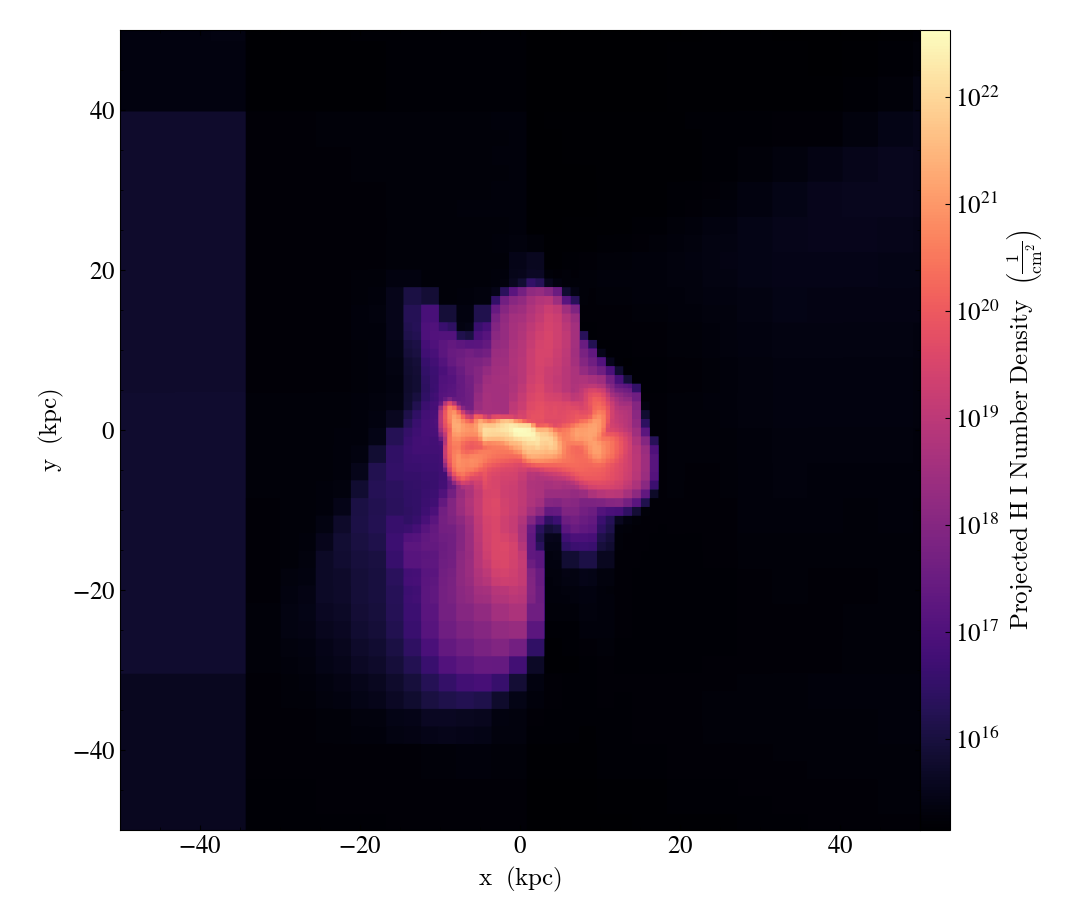

In [9]:
proj_z = yt.ProjectionPlot(ds, 'z', 'H_p0_number_density', center='max', width=(100, 'kpc'))
proj_z.set_cmap(field='H_p0_number_density', cmap='magma')


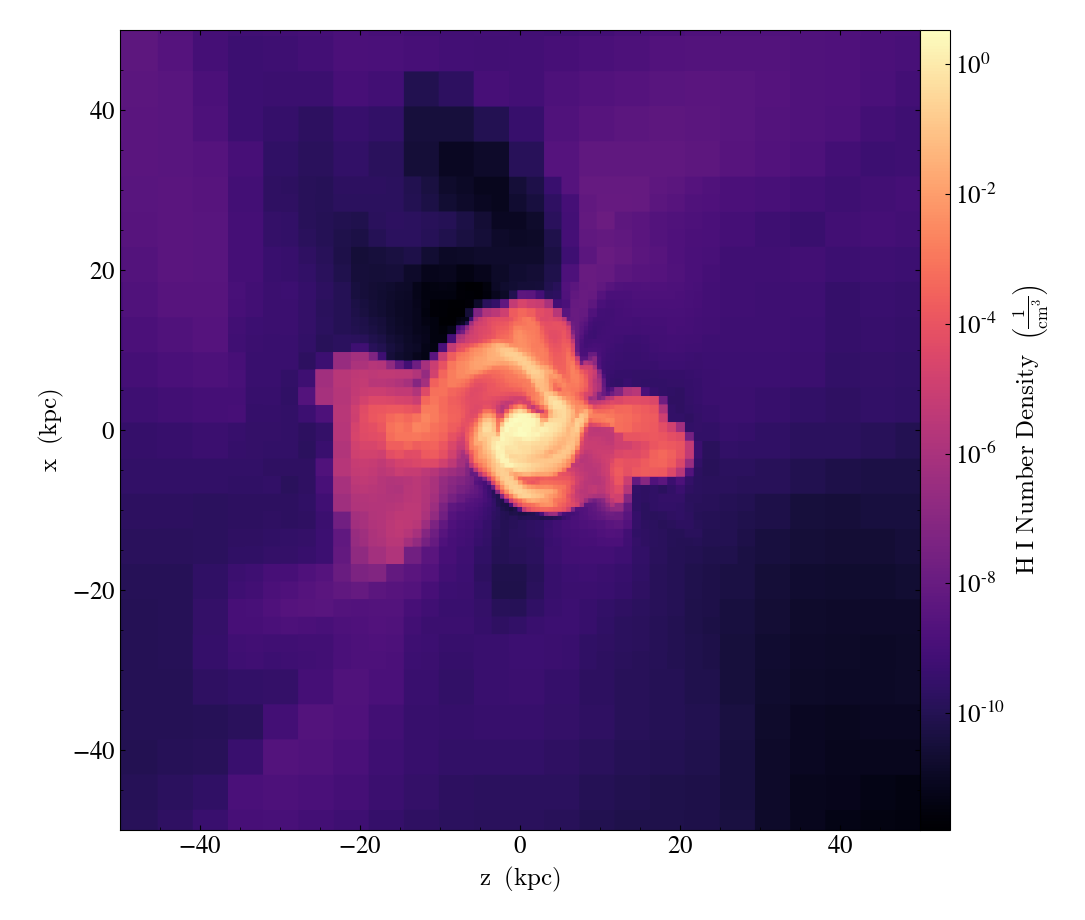

In [10]:
slc_y = yt.SlicePlot(ds, 'y', 'H_p0_number_density', center='max', width=(100, 'kpc'))
slc_y.set_cmap(field='H_p0_number_density', cmap='magma')


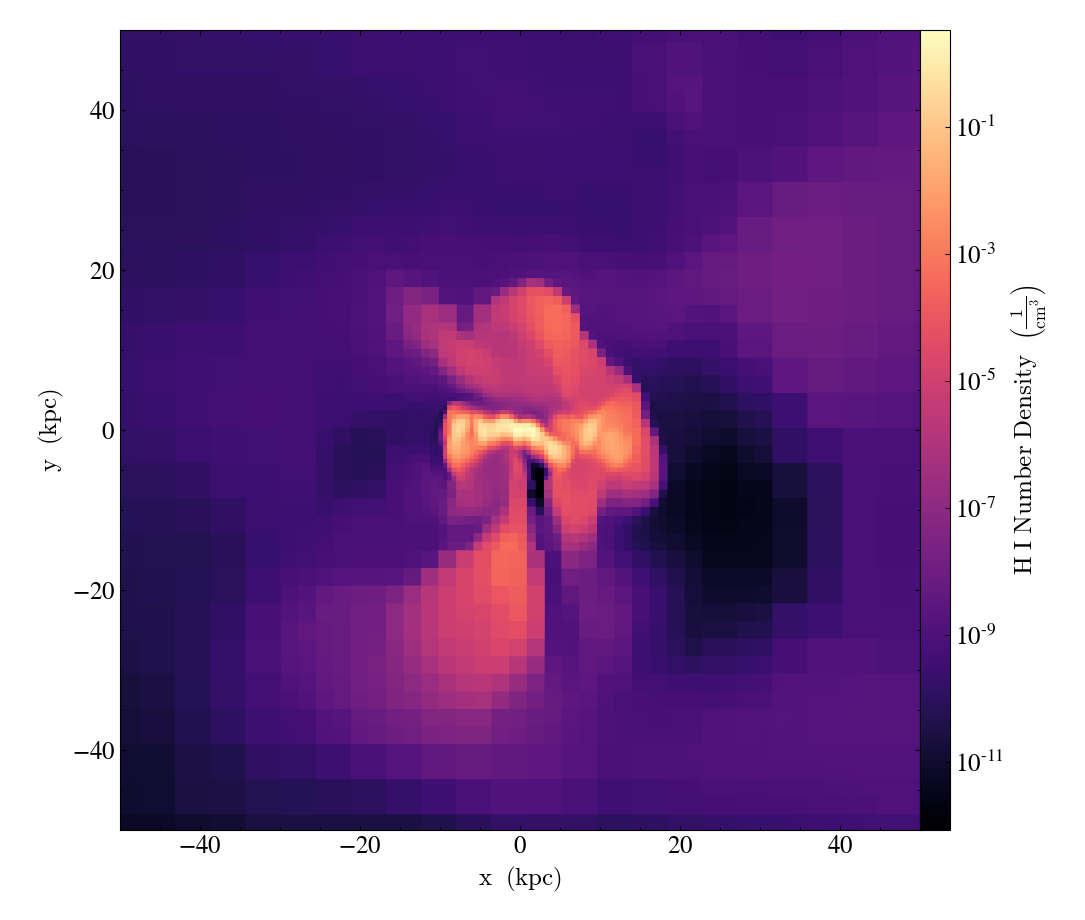

In [12]:
slc_z = yt.SlicePlot(ds, 'z', 'H_p0_number_density', center='max', width=(100, 'kpc'))
slc_z.set_cmap(field='H_p0_number_density', cmap='magma')

In [4]:
cent = ds.find_max('H_p0_number_density')
center = cent[1]

Parsing Hierarchy : 100%|██████████| 1817/1817 [00:00<00:00, 7562.85it/s]


In [73]:
curr_field='H_p0_number_density'
slc_x = yt.SlicePlot(ds, 'x', curr_field, center=center, width=(100, 'kpc'))
slc_x.set_cmap(field=curr_field, cmap='magma')
slc_x.set_background_color(curr_field)
slc_x.save("HI.png")

['HI.png']

In [72]:
curr_field='C_p3_number_density'
slc_x = yt.SlicePlot(ds, 'x', curr_field, center=center, width=(100, 'kpc'))
slc_x.set_cmap(field=curr_field, cmap='magma')
slc_x.set_background_color(curr_field)
slc_x.save("CIV.png")

['CIV.png']

In [71]:
curr_field = 'O_p5_number_density'
slc_x = yt.SlicePlot(ds, 'x', curr_field, center=center, width=(100, 'kpc'))
slc_x.set_cmap(field=curr_field, cmap='magma')
slc_x.set_background_color(curr_field)
slc_x.save("OVI.png")

['OVI.png']

In [53]:
impact_param=-10
rbegin = center + ds.arr([0, -100, impact_param], 'kpc').in_units('code_length')
rend = center + ds.arr([0, 100, impact_param], 'kpc').in_units('code_length')
ray = trident.make_simple_ray(ds, rbegin, rend, lines=line_list)

/mnt/home/boydbre1/local/yt-conda/lib/python3.7/site-packages/yt/units/yt_array.py:1394: RuntimeWarning: invalid value encountered in true_divide
  out=out, **kwargs)


/mnt/home/boydbre1/local/yt-conda/lib/python3.7/site-packages/yt/units/yt_array.py:1394: RuntimeWarning: invalid value encountered in true_divide
  out=out, **kwargs)



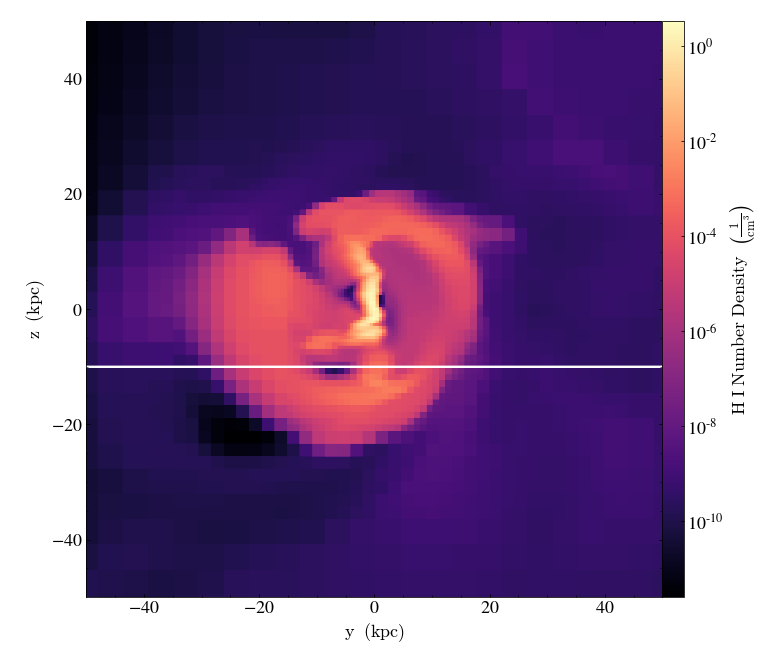

In [74]:
slc_x.annotate_clear()
slc_x.annotate_ray(ray, arrow=True)

In [64]:
sg = trident.SpectrumGenerator(lambda_min=1000, lambda_max=1580, dlambda=0.1)
sg.make_spectrum(ray, lines=line_list)

Adding line - O VI 1032 [1031.912000 A]: : 100%|██████████| 75/75 [00:00<00:00, 2702.49it/s]


In [65]:
sg.plot_spectrum()

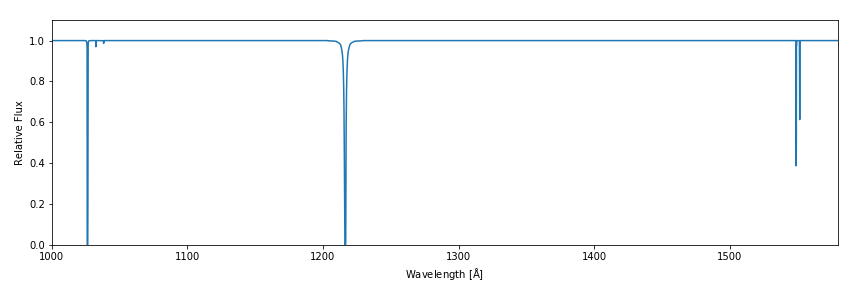

In [66]:
Image("spectrum.png")

In [67]:
def plot_spec(sg, cent):
    plt.figure(figsize=(9, 4))
    flux = sg.flux_field
    lam = sg.lambda_field
    
    plt.plot(lam, flux)
    
    plt.xlim(cent-30, cent+30)
    plt.ylim(0, 1.05)

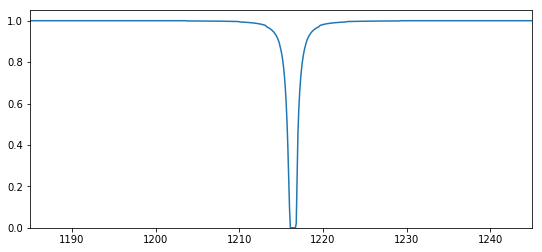

In [68]:
plot_spec(sg, 1215)

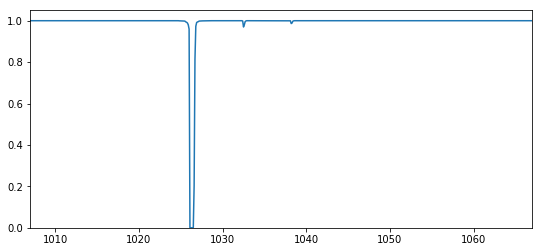

In [69]:
plot_spec(sg, 1037)

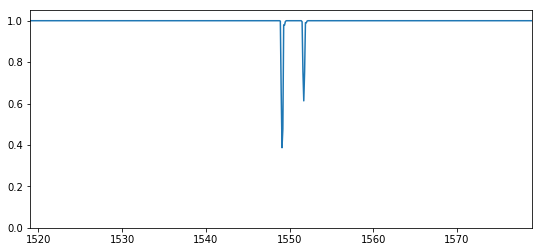

In [70]:
plot_spec(sg, 1549)